Name: Emin Eren Sarı

ID: 191104087

Course: BIL470

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dt import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

import warnings
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated', category=FutureWarning)

# Exploratory Data Analysis (EDA) for IRIS


Özet Veri:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

          Species  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


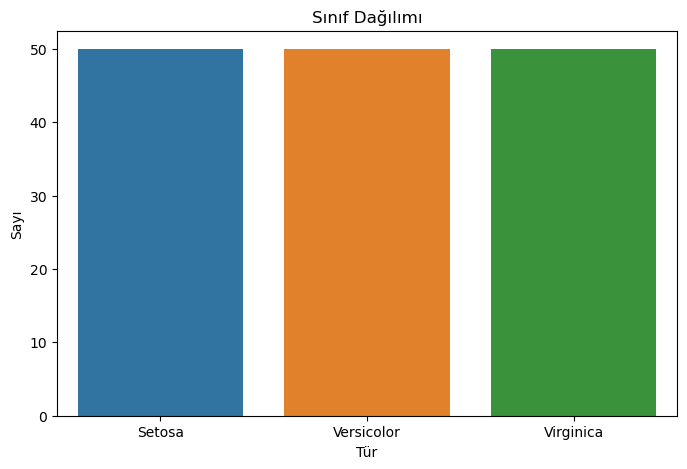

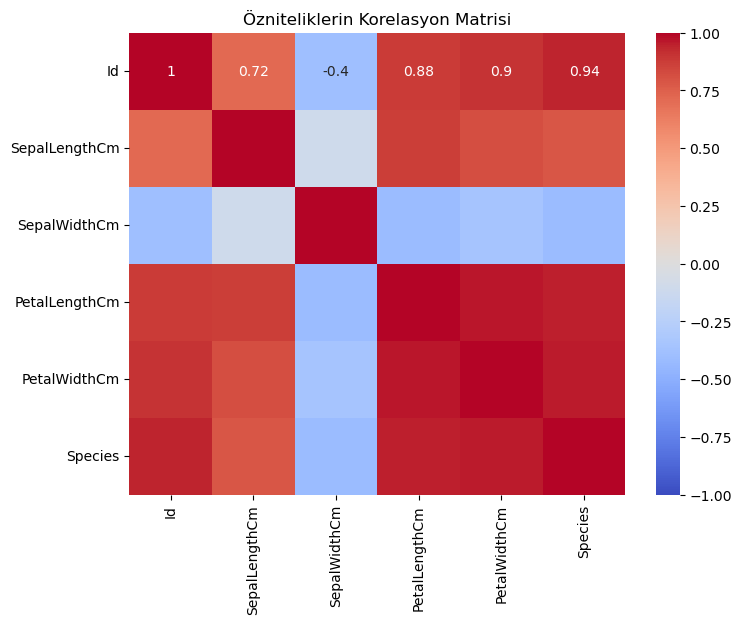

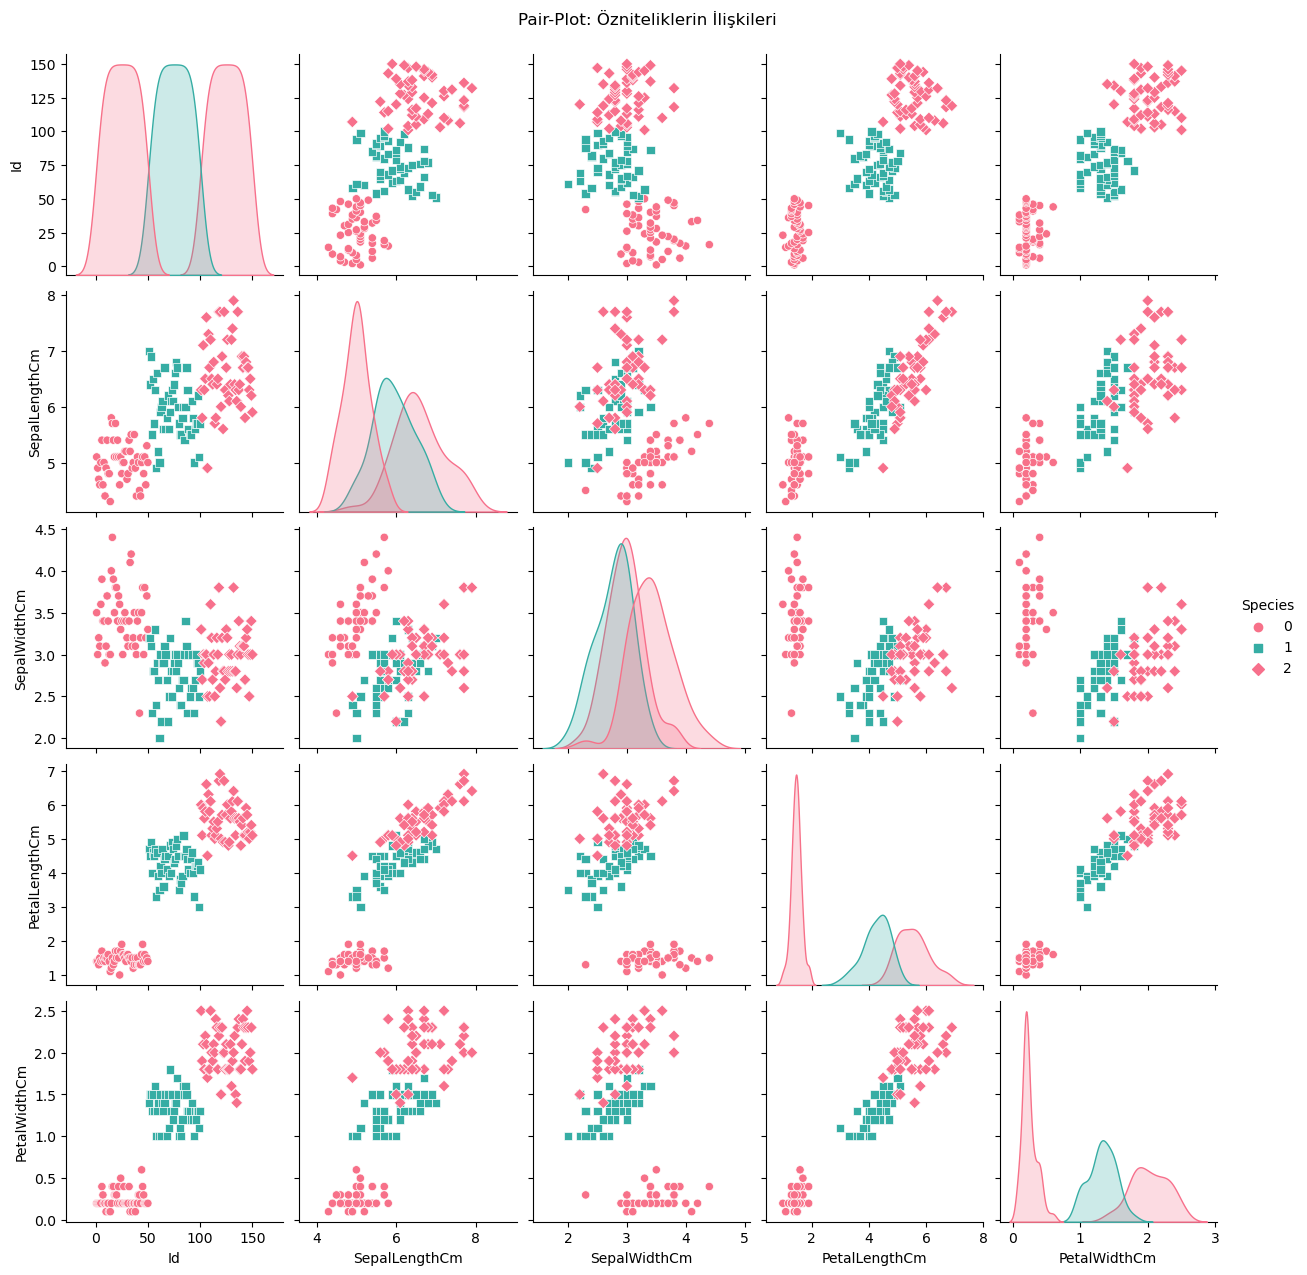

In [4]:
iris_data = pd.read_csv('Iris.csv')
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['Species'] = iris_data['Species'].map(species_map)

print("\nÖzet Veri:")
print(iris_data.describe())

plt.figure(figsize=(8, 5))
sns.countplot(x='Species', data=iris_data)
plt.title('Sınıf Dağılımı')
plt.xlabel('Tür')
plt.ylabel('Sayı')
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

correlation_matrix = iris_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Özniteliklerin Korelasyon Matrisi')
plt.show()

# Pair-plot grafikleri
sns.pairplot(iris_data, hue='Species', markers=['o', 's', 'D'], palette='husl')
plt.suptitle('Pair-Plot: Özniteliklerin İlişkileri', y=1.02)
plt.show()

# Train the classifier

In [6]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [8]:
# Veriyi böl
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)




### Train The Classifier

In [10]:
clf.fit(X_train, y_train)

### Predict Class of Test values

In [12]:
# Tahmin
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### Results

In [14]:
# Performans Metrikleri
def print_metrics(y_true, y_pred, label):
    print(f'{label} için Performans Metrikleri:')
    print(f'Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}')
    print(f'F1-Score: {f1_score(y_true, y_pred, average="macro"):.2f}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred, average="macro"):.2f}')
    print(f'Recall: {recall_score(y_true, y_pred, average="macro"):.2f}')

print_metrics(y_train, y_train_pred, 'Eğitim')
print_metrics(y_test, y_test_pred, 'Test')


Eğitim için Performans Metrikleri:
Confusion Matrix:
[[39  0  0]
 [ 0 40  0]
 [ 0  0 41]]
F1-Score: 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Test için Performans Metrikleri:
Confusion Matrix:
[[10  1  0]
 [ 0 10  0]
 [ 0  0  9]]
F1-Score: 0.97
Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [15]:
### Hafif overfitting var gibi eğitim verisine çok iyi uymuş ama test verisinde %97 civarında başarılı. Model genel olarak iyi iş çıkarmış.

### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

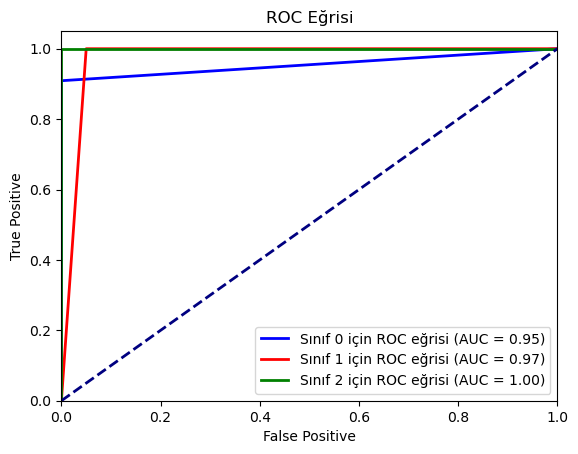

In [17]:
# ROC Eğrisi ve AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_test_pred_bin = label_binarize(y_test_pred, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Her sınıf için ROC eğrisi çizimi
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Sınıf {i} için ROC eğrisi (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

#### Ideal Depth for DT

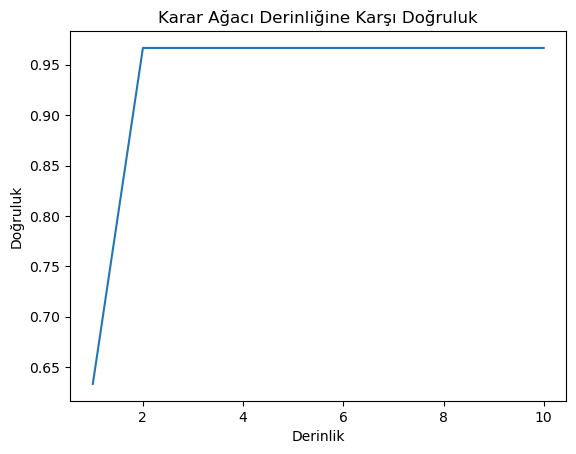

In [19]:
# İdeal Derinlik Hesaplama
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_test_pred))

plt.plot(depths, accuracies)
plt.xlabel('Derinlik')
plt.ylabel('Doğruluk')
plt.title('Karar Ağacı Derinliğine Karşı Doğruluk')
plt.show()

    

In [20]:
# Derinlik 2'ye ulaştığında doğruluk 0.95'in üstüne çıkıyor ve sonra derinlik artsa bile doğruluk değişmiyor. İdeal derinlik 2 diyebiliriz.